<a href="https://colab.research.google.com/github/LyanhVini/Analysis-of-Anthropic-Indicators-in-Amazonian-Communities-/blob/main/Comunidades_ELECTRE_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
procad_df = pd.read_excel("/content/drive/MyDrive/Pesquisas e Projetos/Projeto Comunidades - Análise de dados/Comunidades.xlsx").filter(["P11", "P13", "P14", "P27", "P29", "P30", "P62", "P63", "P64"])


In [ ]:
procad_df

,P11,P13,P14,P27,P29,P30,P62,P63,P64
0,4,X,4,3,1,4,3,3,3
1,4,4,2,4,3,4,2,4,5
2,3,3,1,3,3,3,3,3,3
3,3,4,3,3,2,2,1,4,5
4,3,3,3,3,1,3,3,5,5
...,...,...,...,...,...,...,...,...,...
127,NaN,NaN,NaN,220,NaN,NaN,254,NaN,NaN
128,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
129,NaN,NaN,NaN,76,NaN,NaN,78,NaN,NaN
130,NaN,NaN,NaN,96,NaN,NaN,66,NaN,NaN


In [ ]:
procad_df = procad_df.loc[116:120].reset_index(drop=True)

In [ ]:
procad_df

,P11,P13,P14,P27,P29,P30,P62,P63,P64
0,7,13,25,3,7,8,26,4,4
1,12,18,27,6,3,23,14,6,2
2,25,21,28,17,21,29,22,8,7
3,26,33,17,25,43,23,33,30,15
4,38,17,7,57,30,21,10,57,78


In [ ]:
ant_neg = procad_df.loc[0] + procad_df.loc[1]
ant_neu = procad_df.loc[2]
ant_pos = procad_df.loc[3] + procad_df.loc[4]

In [ ]:
procad_cls_df = pd.DataFrame([ant_neg.values,ant_neu.values,ant_pos.values], columns=procad_df.columns)

In [ ]:
procad_cls_df

,P11,P13,P14,P27,P29,P30,P62,P63,P64
0,19,31,52,9,10,31,40,10,6
1,25,21,28,17,21,29,22,8,7
2,64,50,24,82,73,44,43,87,93


In [ ]:
for i in range(0,3):
  print(f"a{i+1} : {procad_cls_df.loc[i].sum(axis=0) * 100 / procad_df.sum().sum()}")

a1 : 21.987315010570825
a2 : 18.816067653276956
a3 : 59.19661733615222


# ELECTRE II

In [ ]:
!pip install pyDecision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 7.6 MB/s eta 0:00:00


In [ ]:
from pyDecision.algorithm import electre_ii

In [ ]:
W = [0.282,	0.340,	0.064,	0.089,	0.088,	0.079,	0.020, 0.021, 0.018] # Weights

c_minus, c_zero, c_plus = 0.80, 0.30, 0.20
# 0.80, 0.30, 0.20
d_minus, d_plus = 0.40, 0.90
# 0.40, 0.90

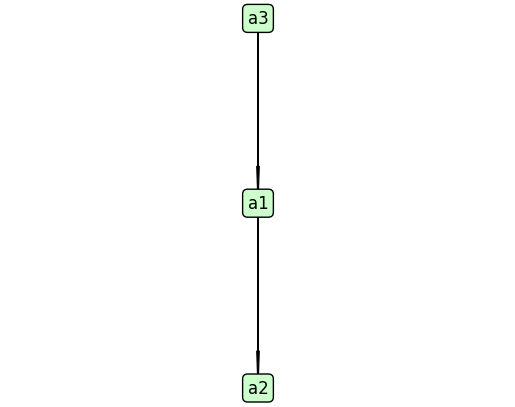

In [ ]:
concordance, discordance, dominance_s, dominance_w, rank_D, rank_A, rank_N, rank_P = electre_ii(procad_cls_df.to_numpy(), W = W, c_minus = c_minus, c_zero = c_zero, c_plus = c_plus, d_minus = d_minus, d_plus = d_plus, graph = True)

# RESULTADOS ELECTRE II
**Ranking Amazonas**<br>

a1 -> a5 -> a2 -> a3 -> a4

1º Pouquíssimo Antrópico (1) - 19.75% <br>
2º Muito antrópico (5) - 37.04% <br>
3º Pouco Antrópico (2) - 12.76% <br>
4º Neutro (3) - 11.52% <br>
5º Antrópico (4) - 18.93% <br>

Parâmetros utilizados:
c_minus = 0.60
c_zero = 0.65
c_plus = 0.90
d_minus = 0.20
d_plus = 0.30
<br>

**Ranking Pará**<br>

a5 -> a4 -> a2 -> a3 -> a1 <br>

1º Muito antrópico (5) - 6.06% <br>
2º Antrópico (4) - 14.14% <br>
3º Pouco Antrópico (2) - 11.11% <br>
4º Neutro (3) - 23.23% <br>
5º Pouquíssimo Antrópico (1) - 45.45%

Parâmetros utilizados:
c_minus = 0.60
c_zero = 0.90
c_plus = 0.95
d_minus = 0.20
d_plus = 0.30

**Ranking Indigenas Tembe (ELECTRE II)**<br>

a5 -> a3 -> a4 -> a2 -> a1 <br>

1º Muito antrópico (5) - 62.96% <br>
2º Neutro (3) - 14.81% <br>
3º Antrópico (4) - 9.26% <br>
4º Pouco Antrópico (2) - 9.26% <br>
5º Pouquíssimo Antrópico (1) - 3.70%

Parâmetros utilizados:
c_minus = 0.60
c_zero = 0.65
c_plus = 0.90
d_minus = 0.20
d_plus = 0.30

# RESULTADOS ELECTRE II - Versão 2
**Ranking Pará**<br>

a3 -> a1 -> a2

1º Antropização Positiva (3) - 69.93% <br>
2º Antropização Negativa (1) - 17.64% <br>
3º Antropização Neutra (2) - 12.42% <br>

Parâmetros utilizados:
c_minus = 0.70
c_zero = 0.80
c_plus = 0.90
d_minus = 0.10
d_plus = 0.20
<br>

**Ranking Amazonas**<br>

a3 -> a1 -> a2

1º Antropização Positiva (3) - 55.97% <br>
2º Antropização Negativa (1) - 32.51% <br>
3º Antropização Neutra (2) - 11.52% <br>

Parâmetros utilizados:
c_minus = 0.70
c_zero = 0.80
c_plus = 0.90
d_minus = 0.10
d_plus = 0.20

**Ranking Amazonas (Oiapoque)**<br>

a3 -> a1 -> a2

1º Antropização Positiva (3) - 53.76%<br>
2º Antropização Negativa (1) - 29.03%<br>
3º Antropização Neutra (2) - 17.20%<br>

Parâmetros utilizados: c_minus = 0.70 c_zero = 0.80 c_plus = 0.90 d_minus = 0.10 d_plus = 0.20
<br>

**Ranking Amazonas (Curiau)**<br>

a3 -> a2 -> a1

1º Antropização Positiva (3) - 49.67%<br>
2º Antropização Negativa (1) - 11.18%<br>
3º Antropização Neutra (2) - 39.14%<br>

Parâmetros utilizados: c_minus = 0.80 c_zero = 0.30 c_plus = 0.20 d_minus = 0.40 d_plus = 0.90
<br>

# RESULTADOS ELECTRE II - Versão 3
**Ranking Pará**<br>

a3 -> a1 -> a2

1º Antropização Positiva (3) - 66.25% <br>
2º Antropização Negativa (1) - 22.22% <br>
3º Antropização Neutra (2) - 11.52% <br>

Parâmetros utilizados:
c_minus = 0.70
c_zero = 0.80
c_plus = 0.90
d_minus = 0.10
d_plus = 0.20
<br>

#RESULTADO ELECTRE II PARA TODAS AS COMUNIDADES

**Ranking Comunidades: Curiau, Oiapoque, São Caetano, Santarém, Amazonas e Tembé**<br>

a3 -> a1 -> a2

1º Antropização Positiva (3) - 59.19%<br>
2º Antropização Negativa (1) - 21.98%<br>
3º Antropização Neutra (2) - 18.81%<br>

Parâmetros utilizados: c_minus = 0.80 c_zero = 0.30 c_plus = 0.20 d_minus = 0.40 d_plus = 0.90
<br>